In [3]:
import polars as pl
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

dataPath = "/kaggle/input/home-credit-credit-risk-model-stability/"

In [4]:
def set_table_dtypes(df: pl.DataFrame) -> pl.DataFrame:
    # implement here all desired dtypes for tables
    # the following is just an example
    for col in df.columns:
        # last letter of column name will help you determine the type
        if col[-1] in ("P", "A"):
            df = df.with_columns(pl.col(col).cast(pl.Float64).alias(col))

    return df


def convert_strings(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        if df[col].dtype.name in ["object", "string"]:
            df[col] = df[col].astype("string").astype("category")
            current_categories = df[col].cat.categories
            new_categories = current_categories.to_list() + ["Unknown"]
            new_dtype = pd.CategoricalDtype(categories=new_categories, ordered=True)
            df[col] = df[col].astype(new_dtype)
    return df

In [22]:
column_names

# use column names to check column names in train_static

x = train_static.columns

# map entries in x to column names in column_namesd

for i in x:
    if i in column_names:
        print(column_names[i])

dpd_of_client_with_tolerance
number_of_instalments_paid_before_due_date_in_the_last_24_months
monthly_annuity_amount
next_months_amount_of_annuity
number_of_applications_associated_with_the_same_email_address_as_the_client
number_of_applications_made_by_the_client_in_the_last_30_days
number_of_applications_associated_with_the_same_phone_number
number_of_applications_made_in_the_last_30_days_by_other_clients_with_the_same_employer_as_the_applicant
number_of_applications_with_the_same_employer_in_the_last_7_days
number_of_applications_associated_with_the_same_mobile_phone
average_days_past_or_before_due_of_payment_during_the_last_24_months
average_days_past_or_before_due_of_payment_during_the_last_3_months
average_days_of_payment_before_due_date_within_the_last_24_months_with_tolerance
average_dpd_days_past_due_with_tolerance_within_the_past_24_months_from_the_maximum_closure_date_assuming_that_the_contract_is_finished_if_the_contract_is_ongoing_the_calculation_is_based_on_the_current_da

In [ ]:
# use the meaningful names dictionary to check columns of the train_static

# we already have it

In [11]:
train_static.columns

['case_id',
 'actualdpdtolerance_344P',
 'amtinstpaidbefduel24m_4187115A',
 'annuity_780A',
 'annuitynextmonth_57A',
 'applicationcnt_361L',
 'applications30d_658L',
 'applicationscnt_1086L',
 'applicationscnt_464L',
 'applicationscnt_629L',
 'applicationscnt_867L',
 'avgdbddpdlast24m_3658932P',
 'avgdbddpdlast3m_4187120P',
 'avgdbdtollast24m_4525197P',
 'avgdpdtolclosure24_3658938P',
 'avginstallast24m_3658937A',
 'avglnamtstart24m_4525187A',
 'avgmaxdpdlast9m_3716943P',
 'avgoutstandbalancel6m_4187114A',
 'avgpmtlast12m_4525200A',
 'bankacctype_710L',
 'cardtype_51L',
 'clientscnt12m_3712952L',
 'clientscnt3m_3712950L',
 'clientscnt6m_3712949L',
 'clientscnt_100L',
 'clientscnt_1022L',
 'clientscnt_1071L',
 'clientscnt_1130L',
 'clientscnt_136L',
 'clientscnt_157L',
 'clientscnt_257L',
 'clientscnt_304L',
 'clientscnt_360L',
 'clientscnt_493L',
 'clientscnt_533L',
 'clientscnt_887L',
 'clientscnt_946L',
 'cntincpaycont9m_3716944L',
 'cntpmts24_3658933L',
 'commnoinclast6m_3546845L',


In [26]:
train_basetable = pl.read_csv("train_base.csv")
train_static = pl.concat(
    [
        pl.read_csv("train_static_0_0.csv").pipe(set_table_dtypes),
        pl.read_csv("train_static_0_1.csv").pipe(set_table_dtypes),
    ],
    how="vertical_relaxed",
)
train_static_cb = pl.read_csv("train_static_cb_0.csv").pipe(set_table_dtypes)
train_person_1 = pl.read_csv("train_person_1.csv").pipe(set_table_dtypes)
train_credit_bureau_b_2 = pl.read_csv("train_credit_bureau_b_2.csv").pipe(
    set_table_dtypes
)

In [23]:
train_static_cb

case_id,assignmentdate_238D,assignmentdate_4527235D,assignmentdate_4955616D,birthdate_574D,contractssum_5085716L,dateofbirth_337D,dateofbirth_342D,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,description_5085714M,education_1103M,education_88M,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
i64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,f64
357,null,null,null,"""1988-04-01""",null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,6.0,6301.4,null,"""2019-01-25""",null,null,null,null,null,null
381,null,null,null,"""1973-11-01""",null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,6.0,4019.6,null,"""2019-01-25""",null,null,null,null,null,null
388,null,null,null,"""1989-04-01""",null,"""1989-04-01""",null,6.0,8.0,2.0,10.0,4.0,"""a55475b1""","""a55475b1""","""a55475b1""",2.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,6.0,"""a55475b1""","""a55475b1""",10.0,null,null,null,null,null,null,6.0,14548.0,null,"""2019-01-28""",null,null,null,null,3.0,5.0
405,null,null,null,"""1974-03-01""",null,"""1974-03-01""",null,0.0,0.0,0.0,1.0,0.0,"""a55475b1""","""a55475b1""","""a55475b1""",0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,4.0,"""a55475b1""","""a55475b1""",1.0,null,null,null,null,null,null,6.0,10498.24,null,"""2019-01-21""",null,null,null,null,2.0,0.0
409,null,null,null,"""1993-06-01""",null,"""1993-06-01""",null,2.0,3.0,0.0,3.0,1.0,"""a55475b1""","""717ddd49""","""a55475b1""",4.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1.0,"""a7fcb6e5""","""a55475b1""",3.0,null,null,null,null,null,null,7.0,6344.8804,null,"""2019-01-21""",null,null,null,null,0.0,4.0
410,null,null,null,"""1978-06-01""",null,"""1978-06-01""",null,2.0,2.0,2.0,3.0,2.0,"""a55475b1""","""6b2ae0fa""","""a55475b1""",2.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.0,"""3439d993""","""a55475b1""",3.0,null,null,null,null,null,null,12.0,7200.0,null,"""2019-01-22""",null,null,null,null,3.0,6.0
411,"""2017-07-06""",null,null,"""1959-07-01""",null,"""1959-07-01""",null,9.0,9.0,4.0,20.0,7.0,"""a55475b1""","""a55475b1""","""a55475b1""",6.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,20.0,"""a55475b1""","""a55475b1""",20.0,5413.3335,null,null,null,null,5.0,null,null,null,"""2019-01-22""",null,null,null,null,9.0,2.0
412,null,null,null,"""1969-01-01""",null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,7.0,6284.0,null,"""2019-01-22""",null,null,null,null,null,null
413,"""2013-12-25""",null,null,"""1955-12-01""",null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,n

In [7]:
train_basetable

case_id,date_decision,MONTH,WEEK_NUM,target
i64,str,i64,i64,i64
0,"""2019-01-03""",201901,0,0
1,"""2019-01-03""",201901,0,0
2,"""2019-01-04""",201901,0,0
3,"""2019-01-03""",201901,0,0
4,"""2019-01-04""",201901,0,1
5,"""2019-01-02""",201901,0,0
6,"""2019-01-03""",201901,0,0
7,"""2019-01-03""",201901,0,0
8,"""2019-01-03""",201901,0,0


Checking the distribution of the target variable

In [31]:
train_basetable["target"].value_counts()

target,counts
i64,u32
1,47994
0,1478665


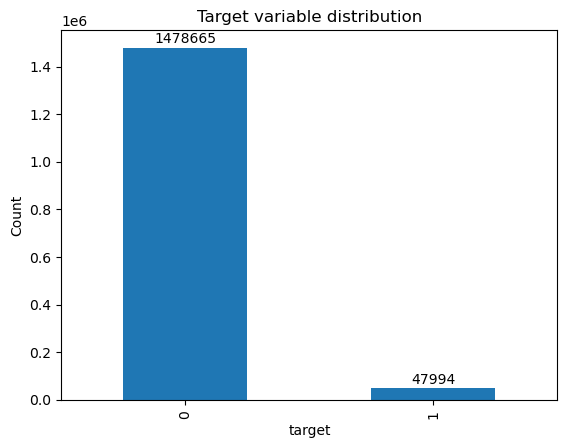

In [8]:
# plot the target variable

import matplotlib.pyplot as plt

# Create the bar plot
ax = train_basetable.to_pandas().target.value_counts().plot(kind="bar")

# Get the current figure for further manipulation
fig = plt.gcf()

# Iterate over the bars
for p in ax.patches:
    # Get the height of the bar, which is also its value
    height = p.get_height()
    # Place a text label on the bar
    ax.text(
        x=p.get_x() + (p.get_width() / 2),
        y=height + 20000,
        s="{:.0f}".format(height),
        ha="center",
    )

# Set the title and show the plot
plt.title("Target variable distribution")

# y title
plt.ylabel("Count")

plt.show()

Is the data consistent over-time?

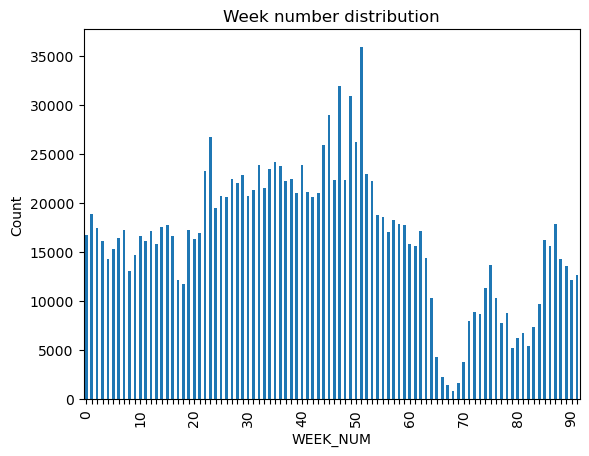

In [9]:
# week num distribution

# Create the bar plot

import matplotlib.pyplot as plt

# Create the bar plot
ax = train_basetable.to_pandas().WEEK_NUM.value_counts().sort_index().plot(kind="bar")

# Get the current figure for further manipulation
fig = plt.gcf()

# Set the title and y-label
plt.title("Week number distribution")
plt.ylabel("Count")

# Get the current x-tick labels
labels = ax.get_xticklabels()

# Set every nth label visible where n is the number of labels you want to skip
n = 10  # change this value to your needs
for i, label in enumerate(labels):
    if i % n == 0:  # this will show every nth label
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()

less data during covid


In [9]:
test_basetable = pl.read_csv("test_base.csv")
test_static = pl.concat(
    [
        pl.read_csv("test_static_0_0.csv").pipe(set_table_dtypes),
        pl.read_csv("test_static_0_1.csv").pipe(set_table_dtypes),
        pl.read_csv("test_static_0_2.csv").pipe(set_table_dtypes),
    ],
    how="vertical_relaxed",
)
test_static_cb = pl.read_csv("test_static_cb_0.csv").pipe(set_table_dtypes)
test_person_1 = pl.read_csv("test_person_1.csv").pipe(set_table_dtypes)
test_credit_bureau_b_2 = pl.read_csv("test_credit_bureau_b_2.csv").pipe(
    set_table_dtypes
)

## Feature engineering

In this part, we can see a simple example of joining tables via `case_id`. Here the loading and joining is done with polars library. Polars library is blazingly fast and has much smaller memory footprint than pandas. 

In [27]:
# We need to use aggregation functions in tables with depth > 1, so tables that contain num_group1 column or
# also num_group2 column.
train_person_1_feats_1 = train_person_1.group_by("case_id").agg(
    pl.col("mainoccupationinc_384A").max().alias("mainoccupationinc_384A_max"),
    (pl.col("incometype_1044T") == "SELFEMPLOYED")
    .max()
    .alias("mainoccupationinc_384A_any_selfemployed"),
)


# Here num_group1=0 has special meaning, it is the person who applied for the loan.
train_person_1_feats_2 = (
    train_person_1.select(["case_id", "num_group1", "housetype_905L"])
    .filter(pl.col("num_group1") == 0)
    .drop("num_group1")
    .rename({"housetype_905L": "person_housetype"})
)

# Here we have num_goup1 and num_group2, so we need to aggregate again.
train_credit_bureau_b_2_feats = train_credit_bureau_b_2.group_by("case_id").agg(
    pl.col("pmts_pmtsoverdue_635A").max().alias("pmts_pmtsoverdue_635A_max"),
    (pl.col("pmts_dpdvalue_108P") > 31).max().alias("pmts_dpdvalue_108P_over31"),
)

# We will process in this examples only A-type and M-type columns, so we need to select them.
selected_static_cols = []
for col in train_static.columns:
    if col[-1] in ("A", "M"):
        selected_static_cols.append(col)
print(selected_static_cols)

selected_static_cb_cols = []
for col in train_static_cb.columns:
    if col[-1] in ("A", "M"):
        selected_static_cb_cols.append(col)
print(selected_static_cb_cols)

# Join all tables together.
data = (
    train_basetable.join(
        train_static.select(["case_id"] + selected_static_cols),
        how="left",
        on="case_id",
    )
    .join(
        train_static_cb.select(["case_id"] + selected_static_cb_cols),
        how="left",
        on="case_id",
    )
    .join(train_person_1_feats_1, how="left", on="case_id")
    .join(train_person_1_feats_2, how="left", on="case_id")
    .join(train_credit_bureau_b_2_feats, how="left", on="case_id")
)

['amtinstpaidbefduel24m_4187115A', 'annuity_780A', 'annuitynextmonth_57A', 'avginstallast24m_3658937A', 'avglnamtstart24m_4525187A', 'avgoutstandbalancel6m_4187114A', 'avgpmtlast12m_4525200A', 'credamount_770A', 'currdebt_22A', 'currdebtcredtyperange_828A', 'disbursedcredamount_1113A', 'downpmt_116A', 'inittransactionamount_650A', 'lastapprcommoditycat_1041M', 'lastapprcommoditytypec_5251766M', 'lastapprcredamount_781A', 'lastcancelreason_561M', 'lastotherinc_902A', 'lastotherlnsexpense_631A', 'lastrejectcommoditycat_161M', 'lastrejectcommodtypec_5251769M', 'lastrejectcredamount_222A', 'lastrejectreason_759M', 'lastrejectreasonclient_4145040M', 'maininc_215A', 'maxannuity_159A', 'maxannuity_4075009A', 'maxdebt4_972A', 'maxinstallast24m_3658928A', 'maxlnamtstart6m_4525199A', 'maxoutstandbalancel12m_4187113A', 'maxpmtlast3m_4525190A', 'previouscontdistrict_112M', 'price_1097A', 'sumoutstandtotal_3546847A', 'sumoutstandtotalest_4493215A', 'totaldebt_9A', 'totalsettled_863A', 'totinstallas

In [28]:
data

case_id,date_decision,MONTH,WEEK_NUM,target,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastcancelreason_561M,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectreason_759M,lastrejectreasonclient_4145040M,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,previouscontdistrict_112M,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A,mainoccupationinc_384A_max,mainoccupationinc_384A_any_selfemployed,person_housetype,pmts_pmtsoverdue_635A_max,pmts_dpdvalue_108P_over31
i64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,bool,str,f64,bool
0,"""2019-01-03""",201901,0,0,null,1917.6,0.0,null,null,null,null,30000.0,0.0,0.0,30000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10800.0,false,null,null,null
1,"""2019-01-03""",201901,0,0,null,3134.0,0.0,null,null,null,null,19999.8,0.0,0.0,19999.8,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10000.0,false,null,null,null
2,"""2019-01-04""",201901,0,0,null,4937.0,0.0,null,null,null,null,78000.0,0.0,0.0,78000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",10000.0,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,14000.0,false,null,null,null
3,"""2019-01-03""",201901,0,0,null,4643.6,0.0,null,null,null,null,40000.0,0.0,0.0,40000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",59999.8,"""P94_109_143""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10000.0,false,null,null,null
4,"""2019-01-04""",201901,0,1,null,3390.2,0.0,null,null,null,null,44000.0,0.0,0.0,44000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""P24_27_36""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,24000.0,false,null,null,null
5,"""2019-01-02""",201901,0,0,null,3600.0,0.0,null,null,null,null,60000.0,0.0,0.0,0.0,0.0,0.0,"""a55475b1""","""a55475b1""",null,"""P85_114_140""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,64000.0,false,null,null,null
6,"""2019-01-03""",201901,0,0,null,3110.8,0.0,null,null,null,null,20000.0,0.0,0.0,20000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",15980.0,"""P94_109_143""","""a55475b1""",null,0.0,null,0.0,null

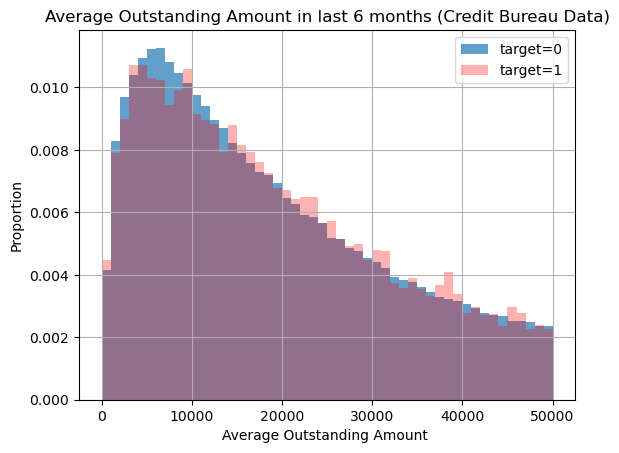

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to pandas DataFrame
df = data.to_pandas()

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Calculate weights for target 0
weights0 = np.ones_like(
    df.loc[
        (df["avgoutstandbalancel6m_4187114A"] < 50000)
        & (df["target"] == 0)
        & (df["avgoutstandbalancel6m_4187114A"] > 0),
        "avgoutstandbalancel6m_4187114A",
    ]
) / len(df.loc[df["target"] == 0])

# Create histogram for target 0
df.loc[
    (df["avgoutstandbalancel6m_4187114A"] < 50000)
    & (df["target"] == 0)
    & (df["avgoutstandbalancel6m_4187114A"] > 0),
    "avgoutstandbalancel6m_4187114A",
].hist(bins=50, ax=ax, alpha=0.7, label="target=0", weights=weights0)

# Calculate weights for target 1
weights1 = np.ones_like(
    df.loc[
        (df["avgoutstandbalancel6m_4187114A"] < 50000)
        & (df["target"] == 1)
        & (df["avgoutstandbalancel6m_4187114A"] > 0),
        "avgoutstandbalancel6m_4187114A",
    ]
) / len(df.loc[df["target"] == 1])

# Create histogram for target 1
df.loc[
    (df["avgoutstandbalancel6m_4187114A"] < 50000)
    & (df["target"] == 1)
    & (df["avgoutstandbalancel6m_4187114A"] > 0),
    "avgoutstandbalancel6m_4187114A",
].hist(bins=50, ax=ax, alpha=0.3, label="target=1", color="r", weights=weights1)

# Set the title and labels
ax.set_title("Average Outstanding Amount in last 6 months (Credit Bureau Data)")
ax.set_ylabel("Proportion")
ax.set_xlabel("Average Outstanding Amount ")

# Add a legend
ax.legend()

plt.show()

In [24]:
data

NameError: name 'data' is not defined

In [13]:
data_pd = data.to_pandas()

In [14]:
# Select only numeric columns
numeric_cols = data_pd.select_dtypes(include=[np.number])

# Calculate the correlation of all numeric variables with the target variable
correlation = numeric_cols.iloc[:5000].corr()["target"]

# Print the correlation
# print(correlation)

# sort the correlation by magnitude

correlation = correlation.abs().sort_values(ascending=False)

print(correlation)

target                             1.000000
downpmt_116A                       0.064245
maininc_215A                       0.052471
lastapprcredamount_781A            0.045235
sumoutstandtotal_3546847A          0.036262
mainoccupationinc_384A_max         0.031000
maxdebt4_972A                      0.029029
price_1097A                        0.024146
pmtssum_45A                        0.024093
pmtaverage_3A                      0.024063
avginstallast24m_3658937A          0.021235
inittransactionamount_650A         0.017743
annuity_780A                       0.016842
annuitynextmonth_57A               0.015769
lastrejectcredamount_222A          0.012577
WEEK_NUM                           0.011486
disbursedcredamount_1113A          0.009122
maxannuity_159A                    0.008949
totaldebt_9A                       0.008905
currdebt_22A                       0.008905
case_id                            0.008224
credamount_770A                    0.007970
totalsettled_863A               

So many features, hard to understand the meaning around them, so better to check relevant features, correlation with the target 

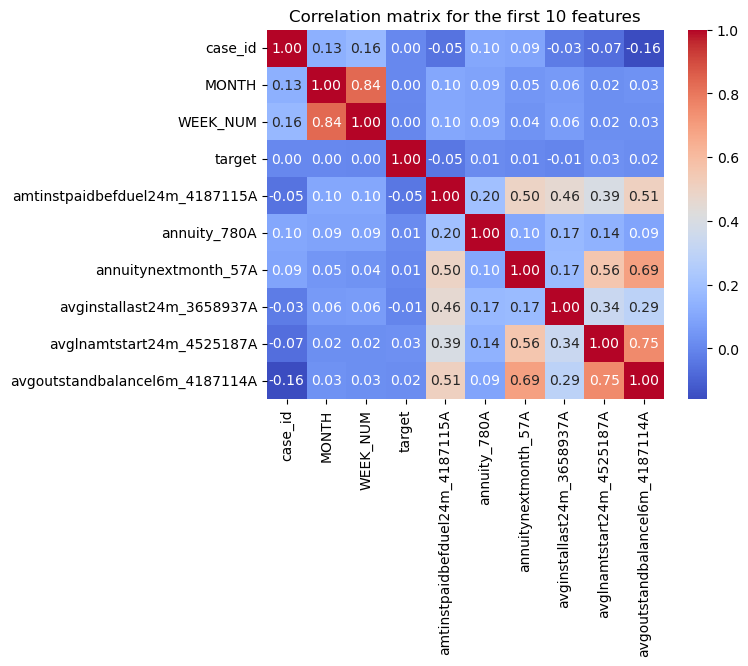

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the first 10 numeric features of the first 50k rows
corr = numeric_cols.iloc[:5000000, :10].corr()

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

# Set the title
ax.set_title("Correlation matrix for the first 10 features")

plt.show()

In [16]:
data

case_id,date_decision,MONTH,WEEK_NUM,target,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastcancelreason_561M,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectreason_759M,lastrejectreasonclient_4145040M,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,previouscontdistrict_112M,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A,mainoccupationinc_384A_max,mainoccupationinc_384A_any_selfemployed,person_housetype,pmts_pmtsoverdue_635A_max,pmts_dpdvalue_108P_over31
i64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,bool,str,f64,bool
0,"""2019-01-03""",201901,0,0,null,1917.6,0.0,null,null,null,null,30000.0,0.0,0.0,30000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10800.0,false,null,null,null
1,"""2019-01-03""",201901,0,0,null,3134.0,0.0,null,null,null,null,19999.8,0.0,0.0,19999.8,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10000.0,false,null,null,null
2,"""2019-01-04""",201901,0,0,null,4937.0,0.0,null,null,null,null,78000.0,0.0,0.0,78000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",10000.0,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,14000.0,false,null,null,null
3,"""2019-01-03""",201901,0,0,null,4643.6,0.0,null,null,null,null,40000.0,0.0,0.0,40000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",59999.8,"""P94_109_143""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10000.0,false,null,null,null
4,"""2019-01-04""",201901,0,1,null,3390.2,0.0,null,null,null,null,44000.0,0.0,0.0,44000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""P24_27_36""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,24000.0,false,null,null,null
5,"""2019-01-02""",201901,0,0,null,3600.0,0.0,null,null,null,null,60000.0,0.0,0.0,0.0,0.0,0.0,"""a55475b1""","""a55475b1""",null,"""P85_114_140""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,64000.0,false,null,null,null
6,"""2019-01-03""",201901,0,0,null,3110.8,0.0,null,null,null,null,20000.0,0.0,0.0,20000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",15980.0,"""P94_109_143""","""a55475b1""",null,0.0,null,0.0,null

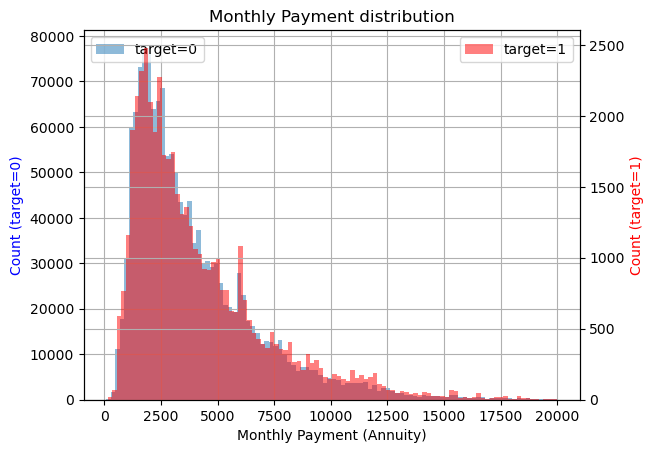

In [17]:
# import matplotlib.pyplot as plt

# # Convert to pandas DataFrame
# df = data.to_pandas()

# # Create histograms for target 0 and 1
# df.loc[(df['annuity_780A'] < 30000) & (df['target'] == 0), 'annuity_780A'].hist(bins=100, alpha=0.5, label='target=0')
# df.loc[(df['annuity_780A'] < 30000) & (df['target'] == 1), 'annuity_780A'].hist(bins=100, alpha=0.5, label='target=1')

# # Set the title and labels
# plt.title('Monthly Annuity distribution')
# plt.ylabel('Count')
# plt.xlabel('Monthly Annuity (Loan Payment)')

# # Add a legend
# plt.legend()

# plt.show()


import matplotlib.pyplot as plt

# Convert to pandas DataFrame
df = data.to_pandas()

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Create histogram for target 0
df.loc[(df["annuity_780A"] < 20000) & (df["target"] == 0), "annuity_780A"].hist(
    bins=100, ax=ax1, alpha=0.5, label="target=0"
)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Create histogram for target 1
df.loc[(df["annuity_780A"] < 20000) & (df["target"] == 1), "annuity_780A"].hist(
    bins=100, ax=ax2, alpha=0.5, label="target=1", color="r"
)

# Set the title and labels
ax1.set_title("Monthly Payment distribution")
ax1.set_ylabel("Count (target=0)", color="b")
ax2.set_ylabel("Count (target=1)", color="r")
ax1.set_xlabel("Monthly Payment (Annuity)")

# Add a legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

Monthly payment distribution is similar among those predicted to default and those predicted to pay back loan

In [18]:
test_person_1_feats_1 = test_person_1.group_by("case_id").agg(
    pl.col("mainoccupationinc_384A").max().alias("mainoccupationinc_384A_max"),
    (pl.col("incometype_1044T") == "SELFEMPLOYED")
    .max()
    .alias("mainoccupationinc_384A_any_selfemployed"),
)

test_person_1_feats_2 = (
    test_person_1.select(["case_id", "num_group1", "housetype_905L"])
    .filter(pl.col("num_group1") == 0)
    .drop("num_group1")
    .rename({"housetype_905L": "person_housetype"})
)

test_credit_bureau_b_2_feats = test_credit_bureau_b_2.group_by("case_id").agg(
    pl.col("pmts_pmtsoverdue_635A").max().alias("pmts_pmtsoverdue_635A_max"),
    (pl.col("pmts_dpdvalue_108P") > 31).max().alias("pmts_dpdvalue_108P_over31"),
)

data_submission = (
    test_basetable.join(
        test_static.select(["case_id"] + selected_static_cols), how="left", on="case_id"
    )
    .join(
        test_static_cb.select(["case_id"] + selected_static_cb_cols),
        how="left",
        on="case_id",
    )
    .join(test_person_1_feats_1, how="left", on="case_id")
    .join(test_person_1_feats_2, how="left", on="case_id")
    .join(test_credit_bureau_b_2_feats, how="left", on="case_id")
)

In [19]:
data_submission

case_id,date_decision,MONTH,WEEK_NUM,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastcancelreason_561M,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectreason_759M,lastrejectreasonclient_4145040M,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,previouscontdistrict_112M,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A,mainoccupationinc_384A_max,mainoccupationinc_384A_any_selfemployed,person_housetype,pmts_pmtsoverdue_635A_max,pmts_dpdvalue_108P_over31
i64,str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,bool,str,f64,bool
57543,"""2021-05-14""",202201,100,191767.36,3674.6,1218.2001,16049.4,17054.4,14554.4,24482.0,20000.0,12154.4,0.0,20000.0,0.0,null,"""a55475b1""","""a55475b1""",14000.0,"""a55475b1""",null,null,"""P109_133_183""","""P49_111_165""",24000.0,"""a55475b1""","""a55475b1""",34000.0,280983.56,null,231440.03,131700.8,16672.6,157731.78,16641.4,"""a55475b1""",0.0,12154.4,12154.4,12154.4,456031.1,17859.6,"""2fc785b2""","""6b2ae0fa""","""a55475b1""","""38c061ee""","""a55475b1""",null,null,null,null,34000.0,false,null,null,null
57549,"""2022-01-17""",202201,100,129704.4,5742.6,3546.6,32426.201,118964.805,13681.714,32426.201,75000.0,10638.2,10638.2,75000.0,0.0,null,"""a55475b1""","""a55475b1""",94000.0,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",160000.0,"""a55475b1""","""P30_86_84""",44000.0,337659.8,null,34066.0,122511.4,31820.6,21278.0,122511.4,"""a55475b1""",null,10638.2,10638.2,10638.2,373720.84,126058.0,"""2fc785b2""","""39a0853f""","""a55475b1""","""a7fcb6e5""","""a55475b1""",null,null,26815.6,null,49800.0,false,null,null,null
57551,"""2020-11-27""",202201,100,71036.4,2844.6,0.0,8357.2,null,0.0,9551.0,27095.201,0.0,0.0,27095.201,0.0,null,"""a55475b1""","""a55475b1""",200000.0,"""P85_114_140""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",70000.0,83400.0,null,54000.0,41783.402,54000.0,62619.0,null,"""P11_36_178""",27095.201,0.0,0.0,0.0,75219.0,null,"""2fc785b2""","""6b2ae0fa""","""a55475b1""","""3439d993""","""a55475b1""",null,null,null,null,59600.0,false,null,null,null
57552,"""2020-11-27""",202201,100,183992.0,6298.8003,12155.4,7440.4,null,199322.4,9148.4,100000.0,191269.61,191269.61,100000.0,0.0,null,"""a55475b1""","""a55475b1""",0.0,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",150000.0,"""a55475b1""","""P94_109_143""",null,110500.0,null,188126.14,12155.4,104473.6,288642.6,12155.4,"""P21_87_50""",null,191269.61,191269.61,191269.61,284213.0,18889.0,"""2fc785b2""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,23402.8,null,112000.0,false,"""OWNED""",null,null
57569,"""2021-12-20""",202201,100,0.0,4682.6,0.0,null,null,null,10796.4,60000.0,0.0,0.0,60000.0,0.0,null,"""a55475b1""","""a55475b1""",20000.0,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",40000.0,"""a55475b1""","""P94_109_143""",6000.0,37704.0,null,64555.668,null,null,0.0,null,"""a55475b1""",null,0.0,0.0,0.0,95348.42,null,"""2fc785b2""","""717ddd49""","""a55475b1""","""3439d993""","""a55475b1""",null,null,17333.6,null,58000.0,false,"""OWNED""",null,null
57630,"""2021-03-16

In [32]:
case_ids = data["case_id"].unique().shuffle(seed=1)
case_ids_train, case_ids_test = train_test_split(
    case_ids, train_size=0.6, random_state=1
)
case_ids_valid, case_ids_test = train_test_split(
    case_ids_test, train_size=0.5, random_state=1
)

cols_pred = []
for col in data.columns:
    if col[-1].isupper() and col[:-1].islower():
        cols_pred.append(col)

print(cols_pred)


def from_polars_to_pandas(case_ids: pl.DataFrame) -> pl.DataFrame:
    return (
        data.filter(pl.col("case_id").is_in(case_ids))[
            ["case_id", "WEEK_NUM", "target"]
        ].to_pandas(),
        data.filter(pl.col("case_id").is_in(case_ids))[cols_pred].to_pandas(),
        data.filter(pl.col("case_id").is_in(case_ids))["target"].to_pandas(),
    )


base_train, X_train, y_train = from_polars_to_pandas(case_ids_train)
base_valid, X_valid, y_valid = from_polars_to_pandas(case_ids_valid)
base_test, X_test, y_test = from_polars_to_pandas(case_ids_test)

for df in [X_train, X_valid, X_test]:
    df = convert_strings(df)

['amtinstpaidbefduel24m_4187115A', 'annuity_780A', 'annuitynextmonth_57A', 'avginstallast24m_3658937A', 'avglnamtstart24m_4525187A', 'avgoutstandbalancel6m_4187114A', 'avgpmtlast12m_4525200A', 'credamount_770A', 'currdebt_22A', 'currdebtcredtyperange_828A', 'disbursedcredamount_1113A', 'downpmt_116A', 'inittransactionamount_650A', 'lastapprcommoditycat_1041M', 'lastapprcommoditytypec_5251766M', 'lastapprcredamount_781A', 'lastcancelreason_561M', 'lastotherinc_902A', 'lastotherlnsexpense_631A', 'lastrejectcommoditycat_161M', 'lastrejectcommodtypec_5251769M', 'lastrejectcredamount_222A', 'lastrejectreason_759M', 'lastrejectreasonclient_4145040M', 'maininc_215A', 'maxannuity_159A', 'maxannuity_4075009A', 'maxdebt4_972A', 'maxinstallast24m_3658928A', 'maxlnamtstart6m_4525199A', 'maxoutstandbalancel12m_4187113A', 'maxpmtlast3m_4525190A', 'previouscontdistrict_112M', 'price_1097A', 'sumoutstandtotal_3546847A', 'sumoutstandtotalest_4493215A', 'totaldebt_9A', 'totalsettled_863A', 'totinstallas

In [21]:
X_train

,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,...,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A
0,NaN,1917.6000,0.0,NaN,NaN,NaN,NaN,30000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4937.0000,0.0,NaN,NaN,NaN,NaN,78000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3600.0000,0.0,NaN,NaN,NaN,NaN,60000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3110.8000,0.0,NaN,NaN,NaN,NaN,20000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1218.0000,0.0,NaN,NaN,NaN,NaN,20300.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915990,104557.25,8218.0000,5293.2,8027.2000,NaN,23399.828,5293.2,132000.0,10548.4,10548.4,...,10586.400,2fc785b2,a55475b1,a55475b1,a55475b1,a55475b1,NaN,NaN,NaN,NaN
915991,176561.36,3675.4001,0.0,7356.8003,NaN,16392.496,6750.2,30000.0,0.0,0.0,...,14346.319,2fc785b2,a55475b1,a55475b1,a55475b1,a55475b1,NaN,NaN,12155.0,NaN
915992,14232.40,7788.8003,0.0,2662.4001,NaN,NaN,1500.6,60000.0,0.0,0.0,...,NaN,2fc785b2,a55475b1,a55475b1,a55475b1,a55475b1,NaN,NaN,NaN,NaN
915993,197371.58,1195.4000,2827.2,8212.6010,NaN,47943.062,9921.2,6000.0,46806.6,46806.6,...,5654.400,2fc785b2,6b2ae0fa,a55475b1,3439d993,a55475b1,NaN,NaN,15792.4,NaN


In [33]:
print(f"Train: {X_train.shape}")
print(f"Valid: {X_valid.shape}")
print(f"Test: {X_test.shape}")

Train: (915995, 48)
Valid: (305332, 48)
Test: (305332, 48)


## Training LightGBM

Minimal example of LightGBM training is shown below.

In [23]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "max_depth": 3,
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "n_estimators": 1000,
    "verbose": -1,
}

gbm = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    callbacks=[lgb.log_evaluation(50), lgb.early_stopping(10)],
)

/Users/farazjawed/miniconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.706346	valid_1's auc: 0.705963
[100]	training's auc: 0.726077	valid_1's auc: 0.724362
[150]	training's auc: 0.734315	valid_1's auc: 0.731423
[200]	training's auc: 0.740133	valid_1's auc: 0.735874
[250]	training's auc: 0.744217	valid_1's auc: 0.739009
[300]	training's auc: 0.747163	valid_1's auc: 0.740965
[350]	training's auc: 0.750072	valid_1's auc: 0.742924
[400]	training's auc: 0.752661	valid_1's auc: 0.744582
[450]	training's auc: 0.754851	valid_1's auc: 0.745977
[500]	training's auc: 0.756586	valid_1's auc: 0.747033
[550]	training's auc: 0.758271	valid_1's auc: 0.747877
[600]	training's auc: 0.760103	valid_1's auc: 0.749039
[650]	training's auc: 0.761793	valid_1's auc: 0.750087
[700]	training's auc: 0.763201	valid_1's auc: 0.750863
Early stopping, best iteration is:
[739]	training's auc: 0.764123	valid_1's auc: 0.751216


In [24]:
# Manually create a dictionary for the evaluation results
evals_result_lgb = {
    "training": {
        "auc": [
            0.705955,
            0.725096,
            0.733544,
            0.739363,
            0.743939,
            0.747006,
            0.749767,
            0.752497,
            0.754843,
            0.756671,
            0.758416,
            0.760171,
            0.761792,
            0.763257,
            0.764526,
            0.76587,
            0.767307,
            0.767588,
        ]
    },
    "valid_1": {
        "auc": [
            0.705883,
            0.723385,
            0.730014,
            0.734597,
            0.738245,
            0.740187,
            0.742172,
            0.74399,
            0.745571,
            0.746474,
            0.747412,
            0.748403,
            0.7492,
            0.749941,
            0.750659,
            0.751443,
            0.75202,
            0.752184,
        ]
    },
}

# Print the evaluation results for the training set
print("Train AUC for each iteration: ", evals_result_lgb["training"]["auc"])

# Print the evaluation results for the validation set
print("Validation AUC for each iteration: ", evals_result_lgb["valid_1"]["auc"])

Train AUC for each iteration:  [0.705955, 0.725096, 0.733544, 0.739363, 0.743939, 0.747006, 0.749767, 0.752497, 0.754843, 0.756671, 0.758416, 0.760171, 0.761792, 0.763257, 0.764526, 0.76587, 0.767307, 0.767588]
Validation AUC for each iteration:  [0.705883, 0.723385, 0.730014, 0.734597, 0.738245, 0.740187, 0.742172, 0.74399, 0.745571, 0.746474, 0.747412, 0.748403, 0.7492, 0.749941, 0.750659, 0.751443, 0.75202, 0.752184]


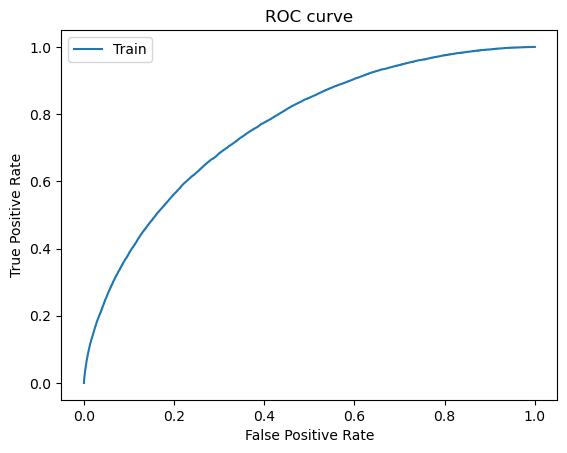

In [25]:
# plot AUC curve

from sklearn.metrics import roc_curve

# Predict the probabilities

y_pred_train = gbm.predict(X_train)

# Calculate the ROC curve

fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)

# Plot the ROC curve

plt.plot(fpr_train, tpr_train, label="Train")

# Set the title and labels

plt.title("ROC curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

# Add a legend

plt.legend()

plt.show()

Evaluation with AUC and then comparison with the stability metric is shown below.

In [35]:
for base, X in [(base_train, X_train), (base_valid, X_valid), (base_test, X_test)]:
    y_pred = gbm.predict(X, num_iteration=gbm.best_iteration)
    base["score"] = y_pred

print(
    f'The AUC score on the train set is: {roc_auc_score(base_train["target"], base_train["score"])}'
)
print(
    f'The AUC score on the valid set is: {roc_auc_score(base_valid["target"], base_valid["score"])}'
)
print(
    f'The AUC score on the test set is: {roc_auc_score(base_test["target"], base_test["score"])}'
)

NameError: name 'gbm' is not defined

In [34]:
def gini_stability(base, w_fallingrate=88.0, w_resstd=-0.5):
    gini_in_time = (
        base.loc[:, ["WEEK_NUM", "target", "score"]]
        .sort_values("WEEK_NUM")
        .groupby("WEEK_NUM")[["target", "score"]]
        .apply(lambda x: 2 * roc_auc_score(x["target"], x["score"]) - 1)
        .tolist()
    )

    x = np.arange(len(gini_in_time))
    y = gini_in_time
    a, b = np.polyfit(x, y, 1)
    y_hat = a * x + b
    residuals = y - y_hat
    res_std = np.std(residuals)
    avg_gini = np.mean(gini_in_time)
    return avg_gini + w_fallingrate * min(0, a) + w_resstd * res_std


stability_score_train = gini_stability(base_train)
stability_score_valid = gini_stability(base_valid)
stability_score_test = gini_stability(base_test)

print(f"The stability score on the train set is: {stability_score_train}")
print(f"The stability score on the valid set is: {stability_score_valid}")
print(f"The stability score on the test set is: {stability_score_test}")

KeyError: "['score'] not in index"

In [28]:
# plot stability score vs accuracy score

import matplotlib.pyplot as plt

In [12]:
# dictionary for meaningful column names


column_names = {
    "actualdpd_943P": "days_past_due_dpd_of_previous_contract_actual",
    "actualdpdtolerance_344P": "dpd_of_client_with_tolerance",
    "addres_district_368M": "district_of_the_persons_address",
    "addres_role_871L": "role_of_persons_address",
    "addres_zip_823M": "zip_code_of_the_address",
    "amount_1115A": "credit_amount_of_the_active_contract_provided_by_the_credit_bureau",
    "amount_416A": "deposit_amount",
    "amount_4527230A": "tax_deductions_amount_tracked_by_the_government_registry",
    "amount_4917619A": "tax_deductions_amount_tracked_by_the_government_registry",
    "amtdebitincoming_4809443A": "incoming_debit_card_transactions_amount",
    "amtdebitoutgoing_4809440A": "outgoing_debit_card_transactions_amount",
    "amtdepositbalance_4809441A": "deposit_balance_of_client",
    "amtdepositincoming_4809444A": "amount_of_incoming_deposits_to_clients_account",
    "amtdepositoutgoing_4809442A": "amount_of_outgoing_deposits_from_clients_account",
    "amtinstpaidbefduel24m_4187115A": "number_of_instalments_paid_before_due_date_in_the_last_24_months",
    "annualeffectiverate_199L": "interest_rate_of_the_closed_contracts",
    "annualeffectiverate_63L": "interest_rate_for_the_active_contracts",
    "annuity_780A": "monthly_annuity_amount",
    "annuity_853A": "monthly_annuity_for_previous_applications",
    "annuitynextmonth_57A": "next_months_amount_of_annuity",
    "applicationcnt_361L": "number_of_applications_associated_with_the_same_email_address_as_the_client",
    "applications30d_658L": "number_of_applications_made_by_the_client_in_the_last_30_days",
    "applicationscnt_1086L": "number_of_applications_associated_with_the_same_phone_number",
    "applicationscnt_464L": "number_of_applications_made_in_the_last_30_days_by_other_clients_with_the_same_employer_as_the_applicant",
    "applicationscnt_629L": "number_of_applications_with_the_same_employer_in_the_last_7_days",
    "applicationscnt_867L": "number_of_applications_associated_with_the_same_mobile_phone",
    "approvaldate_319D": "approval_date_of_previous_application",
    "assignmentdate_238D": "tax_authority_data_date_of_assignment",
    "assignmentdate_4527235D": "tax_authority_data_date_of_assignment",
    "assignmentdate_4955616D": "tax_authority_assignment_date",
    "avgdbddpdlast24m_3658932P": "average_days_past_or_before_due_of_payment_during_the_last_24_months",
    "avgdbddpdlast3m_4187120P": "average_days_past_or_before_due_of_payment_during_the_last_3_months",
    "avgdbdtollast24m_4525197P": "average_days_of_payment_before_due_date_within_the_last_24_months_with_tolerance",
    "avgdpdtolclosure24_3658938P": "average_dpd_days_past_due_with_tolerance_within_the_past_24_months_from_the_maximum_closure_date_assuming_that_the_contract_is_finished_if_the_contract_is_ongoing_the_calculation_is_based_on_the_current_date",
    "avginstallast24m_3658937A": "average_instalments_paid_by_the_client_over_the_past_24_months",
    "avglnamtstart24m_4525187A": "average_loan_amount_in_the_last_24_months",
    "avgmaxdpdlast9m_3716943P": "average_days_past_due_dpd_of_the_client_in_last_9_months",
    "avgoutstandbalancel6m_4187114A": "average_outstanding_balance_of_applicant_for_the_last_6_months",
    "avgpmtlast12m_4525200A": "average_of_payments_made_by_the_client_in_the_last_12_months",
    "bankacctype_710L": "type_of_applicants_bank_account",
    "birth_259D": "date_of_birth_of_the_person",
    "birthdate_574D": "clients_date_of_birth_credit_bureau_data",
    "birthdate_87D": "birth_date_of_the_person",
    "byoccupationinc_3656910L": "applicants_income_from_previous_applications",
    "cacccardblochreas_147M": "card_blocking_reason",
    "cancelreason_3545846M": "application_cancellation_reason",
    "cardtype_51L": "type_of_credit_card",
    "childnum_185L": "number_of_children_of_the_applicant",
    "childnum_21L": "number_of_children_in_the_previous_application",
    "classificationofcontr_1114M": "classificiation_of_the_active_contract",
    "classificationofcontr_13M": "classificiation_of_the_active_contract",
    "classificationofcontr_400M": "classificiation_of_the_closed_contract",
    "clientscnt_100L": "number_of_applications_with_matching_employers_phone_and_clients",
    "clientscnt_1022L": "number_of_clients_sharing_the_same_mobile_phone",
    "clientscnt_1071L": "number_of_applications_where_the_alternative_phone_number_matches_that_of_the_client",
    "clientscnt_1130L": "number_of_applications_where_clients_phone_number_matches_the_alternative_phone_contact",
    "clientscnt_136L": "number_of_applications_associated_with_same_email_address_as_clients_email",
    "clientscnt_157L": "number_of_clients_whose_employer_has_the_same_phone_number_as_the_client",
    "clientscnt_257L": "number_of_clients_that_share_an_alternative_phone_number_with_the_applicant",
    "clientscnt_304L": "number_of_clients_with_the_same_phone_number",
    "clientscnt_360L": "number_of_clients_that_have_the_same_alternative_phone_number_and_employers_phone_number",
    "clientscnt_493L": "number_of_clients_with_matching_phone_numbers_for_both_the_employer_and_the_client",
    "clientscnt_533L": "number_of_clients_with_same_clients_and_alternatives_phone_number",
    "clientscnt_887L": "number_of_clients_sharing_the_same_employers_phone_number",
    "clientscnt_946L": "number_of_clients_with_matching_mobile_and_employers_number",
    "clientscnt12m_3712952L": "number_of_clients_that_have_used_the_same_mobile_phone_as_the_applicant_in_the_past_12_months",
    "clientscnt3m_3712950L": "number_of_clients_who_have_the_same_mobile_phone_number_in_the_last_3_months",
    "clientscnt6m_3712949L": "total_number_of_clients_who_have_used_the_same_mobile_number_in_the_last_6_months",
    "cntincpaycont9m_3716944L": "number_of_incoming_payments_in_the_past_9_months",
    "cntpmts24_3658933L": "number_of_months_with_any_incoming_payment_in_last_24_months",
    "collater_typofvalofguarant_298M": "collateral_valuation_type_active_contract",
    "collater_typofvalofguarant_407M": "collateral_valuation_type_closed_contract",
    "collater_valueofguarantee_1124L": "value_of_collateral_for_active_contract",
    "collater_valueofguarantee_876L": "value_of_collateral_for_closed_contract",
    "collaterals_typeofguarante_359M": "type_of_collateral_that_was_used_as_a_guarantee_for_a_closed_contract",
    "collaterals_typeofguarante_669M": "collateral_type_for_the_active_contract",
    "commnoinclast6m_3546845L": "number_of_communications_indicating_low_income_in_the_last_six_months",
    "contaddr_district_15M": "zip_code_of_a_contact_persons_address",
    "contaddr_matchlist_1032L": "indicates_whether_the_contact_address_is_found_in_a_code_list",
    "contaddr_smempladdr_334L": "indicates_whether_the_contact_address_is_the_same_as_the_employment_address",
    "contaddr_zipcode_807M": "zip_code_of_contact_address",
    "contractdate_551D": "contract_date_of_the_active_contract",
    "contractenddate_991D": "end_date_of_deposit_contract",
    "contractmaturitydate_151D": "end_date_of_active_contract",
    "contractssum_5085716L": "total_sum_of_values_of_contracts_retrieved_from_external_credit_bureau",
    "contractst_516M": "contract_status",
    "contractst_545M": "contract_status",
    "contractst_964M": "contract_status_of_terminated_credit_contract",
    "contractsum_5085717L": "sum_of_other_contract_values",
    "contracttype_653M": "contract_type",
    "conts_role_79M": "type_of_contact_role_of_a_person",
    "conts_type_509L": "person_contact_type_in_previous_application",
    "creationdate_885D": "date_when_previous_application_was_created",
    "credacc_actualbalance_314A": "actual_balance_on_credit_account",
    "credacc_cards_status_52L": "card_status_of_the_previous_credit_account",
    "credacc_credlmt_575A": "credit_card_credit_limit_provided_for_previous_applications",
    "credacc_maxhisbal_375A": "maximal_historical_balance_of_previous_credit_account",
    "credacc_minhisbal_90A": "minimum_historical_balance_of_previous_credit_accounts",
    "credacc_status_367L": "account_status_of_previous_credit_applications",
    "credacc_transactions_402L": "number_of_transactions_made_with_the_previous_credit_account_of_the_applicant",
    "credamount_590A": "loan_amount_or_card_limit_of_previous_applications",
    "credamount_770A": "loan_amount_or_credit_card_limit",
    "credlmt_1052A": "credit_limit_of_an_active_loan",
    "credlmt_228A": "credit_limit_for_closed_loans",
    "credlmt_230A": "credit_limit_of_the_closed_credit_contracts_from_credit_bureau",
    "credlmt_3940954A": "credit_limit_for_active_loan",
    "credlmt_935A": "credit_limit_for_active_loan",
    "credor_3940957M": "creditors_name",
    "credquantity_1099L": "number_of_credits_in_credit_bureau",
    "credquantity_984L": "number_of_closed_credits_in_credit_bureau",
    "credtype_322L": "type_of_credit",
    "credtype_587L": "credit_type_of_previous_application",
    "currdebt_22A": "current_debt_amount_of_the_client",
    "currdebt_94A": "previous_applications_current_debt",
    "currdebtcredtyperange_828A": "current_amount_of_debt_of_the_applicant",
    "dateactivated_425D": "contract_activation_date_of_the_applicants_previous_application",
    "datefirstoffer_1144D": "date_of_first_customer_relationship_management_crm_offer",
    "datelastinstal40dpd_247D": "date_of_last_instalment_that_was_more_than_40_days_past_due_dpd",
    "datelastunpaid_3546854D": "date_of_the_last_unpaid_instalment",
    "dateofbirth_337D": "clients_date_of_birth",
    "dateofbirth_342D": "clients_date_of_birth",
    "dateofcredend_289D": "end_date_of_an_active_credit_contract",
    "dateofcredend_353D": "end_date_of_a_closed_credit_contract",
    "dateofcredstart_181D": "date_when_the_credit_contract_was_closed",
    "dateofcredstart_739D": "start_date_of_a_closed_credit_contract",
    "dateofrealrepmt_138D": "date_of_credits_closure_contract_termination_date",
    "days120_123L": "number_of_credit_bureau_queries_for_the_last_120_days",
    "days180_256L": "number_of_credit_bureau_queries_for_last_180_days",
    "days30_165L": "number_of_credit_bureau_queries_for_the_last_30_days",
    "days360_512L": "number_of_credit_bureau_queries_for_last_360_days",
    "days90_310L": "number_of_credit_bureau_queries_for_the_last_90_days",
    "daysoverduetolerancedd_3976961L": "number_of_days_that_past_after_the_due_date_with_tolerance",
    "debtoutstand_525A": "outstanding_amount_of_existing_contract",
    "debtoverdue_47A": "amount_that_is_currently_past_due_on_a_clients_existing_credit_contract",
    "debtpastduevalue_732A": "amount_of_unpaid_debt_for_existing_contracts",
    "debtvalue_227A": "outstanding_amount_for_existing_debt_contracts",
    "deductiondate_4917603D": "tax_deduction_date",
    "deferredmnthsnum_166L": "number_of_deferred_months",
    "description_351M": "categorization_of_clients_by_credit_bureau",
    "description_5085714M": "categorization_of_clients_by_credit_bureau",
    "disbursedcredamount_1113A": "disbursed_credit_amount_after_consolidation",
    "disbursementtype_67L": "type_of_disbursement",
    "district_544M": "district_of_the_address_used_in_the_previous_loan_application",
    "downpmt_116A": "amount_of_downpayment",
    "downpmt_134A": "previous_application_downpayment_amount",
    "dpd_550P": "the_number_of_days_past_due_for_active_loans_where_a_guarantee_has_been_provided",
    "dpd_733P": "days_past_due_dpd_for_guaranteed_loans_that_were_terminated_according_to_credit_bureau_data",
    "dpdmax_139P": "maximal_days_past_due_for_active_contract",
    "dpdmax_757P": "maximum_days_past_due_for_a_closed_contract",
    "dpdmax_851P": "maximal_past_due_days_for_active_contracts_in_the_credit_bureau",
    "dpdmaxdatemonth_442T": "max_dpd_occurrence_month_for_terminated_contracts_from_credit_bureau_data",
    "dpdmaxdatemonth_804T": "month_when_the_maximum_day_past_due_dpd_occurred_for_active_contracts_on_credit_bureaus_records",
    "dpdmaxdatemonth_89T": "month_when_maximum_days_past_due_occurred_on_the_active_contract_with_the_credit_bureau",
    "dpdmaxdateyear_596T": "year_when_maximum_days_past_due_dpd_occurred_for_the_active_contract",
    "dpdmaxdateyear_742T": "year_of_the_maximum_days_past_due_dpd_on_an_active_credit_contract_in_the_credit_bureau",
    "dpdmaxdateyear_896T": "year_of_maximum_days_past_due_of_closed_contract_obtained_from_credit_bureau",
    "dtlastpmt_581D": "date_of_last_payment_made_by_the_applicant",
    "dtlastpmtallstes_3545839D": "date_of_the_applicants_last_payment",
    "dtlastpmtallstes_4499206D": "date_of_last_payment_made_by_the_applicant",
    "education_1103M": "level_of_education_of_the_client_provided_by_external_source",
    "education_1138M": "applicants_education_level_from_their_previous_application",
    "education_88M": "education_level_of_the_client",
    "education_927M": "education_level_of_the_person",
    "eir_270L": "interest_rate",
    "empl_employedfrom_271D": "start_date_of_employment",
    "empl_employedtotal_800L": "employment_length_of_a_person",
    "empl_industry_691L": "employment_industry_of_the_person",
    "empladdr_district_926M": "district_where_the_employers_address_is_located",
    "empladdr_zipcode_114M": "zipcode_of_employers_address",
    "employedfrom_700D": "employment_start_date_from_the_previous_application",
    "employername_160M": "employers_name",
    "empls_economicalst_849M": "the_economical_status_of_the_person_num_group1_person_num_group2_employment",
    "empls_employedfrom_796D": "start_of_employment_num_group1_person_num_group2_employment",
    "empls_employer_name_740M": "employers_name_num_group1_person_num_group2_employment",
    "equalitydataagreement_891L": "flag_indicating_sudden_changes_in_clients_socialdemographic_data_eg_education_family_status_housing_type",
    "equalityempfrom_62L": "flag_indicating_a_sudden_change_in_the_clients_length_of_employment",
    "familystate_447L": "family_state_of_the_person",
    "familystate_726L": "family_state_in_previous_application_of_applicant",
    "financialinstitution_382M": "name_of_financial_institution_that_is_linked_to_a_closed_contract",
    "financialinstitution_591M": "financial_institution_name_of_the_active_contract",
    "firstclxcampaign_1125D": "date_of_the_clients_first_campaign",
    "firstdatedue_489D": "date_of_the_first_due_date",
    "firstnonzeroinstldate_307D": "date_of_first_instalment_in_the_previous_application",
    "firstquarter_103L": "number_of_results_obtained_from_credit_bureau_in_the_first_quarter",
    "for3years_128L": "number_of_rejected_applications_in_the_past_3_years",
    "for3years_504L": "clients_credit_history_data_over_the_last_three_years",
    "for3years_584L": "number_of_cancellations_in_the_last_3_years",
    "formonth_118L": "number_of_rejections_in_a_month",
    "formonth_206L": "number_of_cancelations_in_the_previous_month",
    "formonth_535L": "credit_history_for_the_last_month",
    "forquarter_1017L": "number_of_cancellations_recorded_in_the_credit_bureau_in_the_last_quarter",
    "forquarter_462L": "number_of_credit_applications_that_were_rejected_in_the_last_quarter",
    "forquarter_634L": "credit_history_for_the_last_quarter",
    "fortoday_1092L": "clients_credit_history_for_today",
    "forweek_1077L": "number_of_cancelations_in_the_last_week",
    "forweek_528L": "credit_history_for_the_last_week",
    "forweek_601L": "number_of_rejected_applications_in_the_last_week",
    "foryear_618L": "number_of_application_rejections_in_the_previous_year",
    "foryear_818L": "number_of_cancelations_that_occurred_in_last_year",
    "foryear_850L": "credit_history_for_the_last_year",
    "fourthquarter_440L": "number_of_results_in_fourth_quarter",
    "gender_992L": "gender_of_a_person",
    "homephncnt_628L": "number_of_distinct_home_phones_on_clients_application",
    "housetype_905L": "house_type_of_the_person",
    "housingtype_772L": "type_of_housing_of_the_person",
    "incometype_1044T": "type_of_income_of_the_person",
    "inittransactionamount_650A": "initial_transaction_amount_of_the_credit_application",
    "inittransactioncode_186L": "transaction_type_of_the_initial_credit_transaction",
    "inittransactioncode_279L": "type_of_the_initial_transaction_made_in_the_previous_application_of_the_client",
    "installmentamount_644A": "instalment_amount_of_a_closed_and_secured_credit_contract",
    "installmentamount_833A": "instalment_amount_for_a_secured_and_active_contract_in_credit_bureau",
    "instlamount_768A": "instalment_amount_for_the_active_contract_in_credit_bureau",
    "instlamount_852A": "instalment_amount_for_closed_contract",
    "instlamount_892A": "instalment_amount_for_active_credit_contract",
    "interesteffectiverate_369L": "interest_rate_on_active_contract",
    "interestrate_311L": "the_interest_rate_of_the_active_credit_contract",
    "interestrate_508L": "interest_rate_for_a_closed_contract_in_the_credit_bureau",
    "interestrategrace_34L": "interest_rate_during_the_grace_period",
    "interestrateyearly_538L": "annual_interest_rate_for_existing_contract_obtained_from_credit_bureau",
    "isbidproduct_1095L": "flag_indicating_if_the_product_is_a_crosssell",
    "isbidproduct_390L": "flag_for_determining_if_the_product_is_a_crosssell_in_previous_applications",
    "isbidproductrequest_292L": "flag_indicating_if_the_product_is_a_crosssell",
    "isdebitcard_527L": "previous_application_flag_indicating_if_product_being_applied_for_is_a_debit_card",
    "isdebitcard_729L": "flag_indicating_if_the_product_is_a_debit_card",
    "isreference_387L": "flag_indicating_whether_the_person_is_a_reference_contact",
    "language1_981M": "the_primary_language_of_the_person",
    "last180dayaveragebalance_704A": "average_balance_on_debit_card_in_the_last_180_days",
    "last180dayturnover_1134A": "debit_cards_turnover_within_the_last_180_days",
    "last30dayturnover_651A": "debit_card_turnover_for_the_last_30_days",
    "lastactivateddate_801D": "contract_activation_date_for_previous_applications",
    "lastapplicationdate_877D": "date_of_previous_customers_application",
    "lastapprcommoditycat_1041M": "commodity_category_of_the_last_loan_applications_made_by_the_applicant",
    "lastapprcommoditytypec_5251766M": "commodity_type_of_the_last_application",
    "lastapprcredamount_781A": "credit_amount_from_the_clients_last_application",
    "lastapprdate_640D": "date_of_approval_on_clients_most_recent_previous_application",
    "lastcancelreason_561M": "cancellation_reason_of_the_last_application",
    "lastdelinqdate_224D": "date_of_the_last_delinquency_occurrence",
    "lastdependentsnum_448L": "number_of_dependents_in_the_clients_last_loan_application",
    "lastotherinc_902A": "amount_of_other_income_reported_by_the_client_in_their_last_application",
    "lastotherlnsexpense_631A": "monthly_expenses_on_other_loans_from_the_last_application",
    "lastrejectcommoditycat_161M": "category_of_commodity_in_the_applicants_last_rejected_application",
    "lastrejectcommodtypec_5251769M": "commodity_type_of_the_last_rejected_application",
    "lastrejectcredamount_222A": "credit_amount_on_last_rejected_application",
    "lastrejectdate_50D": "date_of_most_recent_rejected_application_by_the_applicant",
    "lastrejectreason_759M": "reason_for_rejection_on_the_most_recent_rejected_application",
    "lastrejectreasonclient_4145040M": "reason_for_the_clients_last_loan_rejection",
    "lastrepayingdate_696D": "date_of_the_last_payment_made_by_the_applicant",
    "lastst_736L": "status_of_the_clients_previous_credit_application",
    "lastupdate_1112D": "date_of_last_update_for_an_active_contract_from_credit_bureau",
    "lastupdate_260D": "last_update_date_for_the_active_contracts",
    "lastupdate_388D": "date_of_last_update_for_a_closed_contract_in_the_credit_bureau",
    "maininc_215A": "clients_primary_income_amount",
    "mainoccupationinc_384A": "amount_of_the_main_income_of_the_client",
    "mainoccupationinc_437A": "clients_main_income_amount_in_their_previous_application",
    "maritalst_385M": "marital_status_of_the_client",
    "maritalst_703L": "marital_status_of_the_client",
    "maritalst_893M": "marital_status_of_the_client",
    "mastercontrelectronic_519L": "flag_indicating_the_existence_of_the_master_contract_for_the_client",
    "mastercontrexist_109L": "flag_indicating_whether_or_not_the_applicant_has_an_existing_master_contract",
    "maxannuity_159A": "maximum_annuity_previously_obtained_by_client",
    "maxannuity_4075009A": "maximal_annuity_offered_to_the_client_in_the_current_application",
    "maxdbddpdlast1m_3658939P": "maximum_number_of_days_past_due_in_the_last_month_a_negative_value_indicates_the_number_of_days_before_the_due_date",
    "maxdbddpdtollast12m_3658940P": "maximum_number_of_days_past_due_in_last_12_months_a_negative_value_implies_days_before_due_date",
    "maxdbddpdtollast6m_4187119P": "maximum_number_of_days_past_due_in_last_6_months_this_predictor_takes_the_value_as_a_negative_number_when_it_represents_days_before_due_date",
    "maxdebt4_972A": "maximal_principal_debt_of_the_client_in_the_history_older_than_4_months",
    "maxdebtpduevalodued_3940955A": "days_past_due_at_the_time_of_the_maximum_debt",
    "maxdpdfrom6mto36m_3546853P": "maximum_days_past_due_dpd_in_the_period_ranging_from_6_to_36_months",
    "maxdpdinstldate_3546855D": "date_of_instalment_on_which_client_was_most_days_past_due",
    "maxdpdinstlnum_3546846P": "instalment_number_of_which_client_was_most_days_past_due",
    "maxdpdlast12m_727P": "maximum_days_past_due_in_the_past_12_months",
    "maxdpdlast24m_143P": "maximal_days_past_due_in_the_last_24_months",
    "maxdpdlast3m_392P": "maximum_number_of_days_past_due_in_last_3_months",
    "maxdpdlast6m_474P": "maximum_days_past_due_in_the_last_6_months",
    "maxdpdlast9m_1059P": "maximum_days_past_due_in_last_9_months",
    "maxdpdtolerance_374P": "maximum_number_of_days_past_due_with_tolerance",
    "maxdpdtolerance_577P": "maximum_dpd_with_tolerance_on_previous_application/s",
    "maxinstallast24m_3658928A": "maximum_instalment_in_the_last_24_months",
    "maxlnamtstart6m_4525199A": "maximum_loan_amount_started_in_the_last_6_months",
    "maxoutstandbalancel12m_4187113A": "maximum_outstanding_balance_in_the_last_12_months",
    "maxpmtlast3m_4525190A": "maximum_payment_made_by_the_client_in_the_last_3_months",
    "mindbddpdlast24m_3658935P": "minimum_days_past_due_or_days_before_due_in_last_24_months",
    "mindbdtollast24m_4525191P": "minimum_days_before_due_in_last_24_months",
    "mobilephncnt_593L": "number_of_persons_with_the_same_mobile_phone_number",
    "monthlyinstlamount_332A": "monthly_instalment_amount_for_active_contract",
    "monthlyinstlamount_674A": "monthly_amount_of_instalment_payment_on_a_closed_contract",
    "monthsannuity_845L": "monthly_annuity_amount_for_the_applicant",
    "name_4527232M": "name_of_employer",
    "name_4917606M": "name_of_employer",
    "nominalrate_281L": "interest_rate_of_the_active_contract",
    "nominalrate_498L": "interest_rate_for_closed_contract",
    "numactivecreds_622L": "number_of_active_credits",
    "numactivecredschannel_414L": "number_of_active_credits",
    "numactiverelcontr_750L": "number_of_active_revolving_credits",
    "numberofcontrsvalue_258L": "number_of_active_contracts_in_credit_bureau",
    "numberofcontrsvalue_358L": "number_of_closed_credit_contracts",
    "numberofinstls_229L": "number_of_instalments_on_closed_contract",
    "numberofinstls_320L": "number_of_instalments_of_the_active_contract",
    "numberofinstls_810L": "number_of_instalments_for_the_active_contract",
    "numberofoutstandinstls_520L": "number_of_outstanding_instalment_for_closed_contract",
    "numberofoutstandinstls_59L": "number_of_outstanding_instalments_for_the_active_contracts",
    "numberofoverdueinstlmax_1039L": "number_of_outstanding_instalments_for_active_contracts",
    "numberofoverdueinstlmax_1151L": "maximum_number_of_past_due_installments_for_a_closed_contract",
    "numberofoverdueinstlmaxdat_148D": "date_of_maximum_number_of_past_due_instalments_for_the_closed_contract",
    "numberofoverdueinstlmaxdat_641D": "date_of_maximum_number_of_past_due_instalments_for_the_active_contract",
    "numberofoverdueinstls_725L": "maximum_number_of_past_due_instalments_for_an_active_contract",
    "numberofoverdueinstls_834L": "number_of_past_due_instalments_for_a_closed_contract",
    "numberofqueries_373L": "number_of_queries_to_credit_bureau",
    "numcontrs3months_479L": "number_of_contracts_in_last_3_months",
    "numincomingpmts_3546848L": "number_of_incoming_payments",
    "numinstlallpaidearly3d_817L": "number_of_instalments_paid_at_least_3_days_prior_to_their_due_date",
    "numinstls_657L": "number_of_instalments",
    "numinstlsallpaid_934L": "number_of_paid_instalments",
    "numinstlswithdpd10_728L": "number_of_instalments_that_were_overdue_for_10_or_more_days",
    "numinstlswithdpd5_4187116L": "number_of_instalments_that_were_overdue_by_at_least_5_days",
    "numinstlswithoutdpd_562L": "number_of_instalments_that_were_not_past_due_date",
    "numinstmatpaidtearly2d_4499204L": "number_of_instalments_that_have_been_paid_more_than_2_days_before_their_due_date",
    "numinstpaid_4499208L": "number_of_paid_instalments",
    "numinstpaidearly_338L": "number_of_installments_paid_prior_to_the_due_date",
    "numinstpaidearly3d_3546850L": "number_of_instalments_paid_more_than_three_days_before_the_due_date",
    "numinstpaidearly3dest_4493216L": "number_of_instalments_that_have_been_paid_more_than_3_days_in_advance_of_the_due_date",
    "numinstpaidearly5d_1087L": "number_of_instalments_paid_more_than_5_days_prior_to_the_due_date",
    "numinstpaidearly5dest_4493211L": "number_of_instalments_that_were_paid_more_than_5_days_before_the_due_date",
    "numinstpaidearly5dobd_4499205L": "number_of_installments_paid_more_than_5_days_prior_to_the_due_date",
    "numinstpaidearlyest_4493214L": "number_of_instalments_paid_before_the_due_date",
    "numinstpaidlastcontr_4325080L": "number_of_paid_installments_from_the_clients_last_contract",
    "numinstpaidlate1d_3546852L": "number_of_instalments_paid_more_than_1_day_past_their_due_date",
    "numinstregularpaid_973L": "number_of_fully_paid_regular_installments_in_the_clients_previous_contracts",
    "numinstregularpaidest_4493210L": "number_of_fully_paid_regular_installments_on_clients_previous_contracts",
    "numinsttopaygr_769L": "number_of_unpaid_instalments",
    "numinsttopaygrest_4493213L": "number_of_unpaid_instalments",
    "numinstunpaidmax_3546851L": "maximum_number_of_unpaid_instalments",
    "numinstunpaidmaxest_4493212L": "maximum_number_of_unpaid_instalments",
    "numnotactivated_1143L": "number_of_nonactivated_credits",
    "numpmtchanneldd_318L": "number_of_previous_loan_contracts_for_the_applicant_that_had_direct_debit_as_payment_channel",
    "numrejects9m_859L": "number_of_credit_applications_that_were_rejected_in_the_last_9_months",
    "opencred_647L": "number_of_active_loans_from_the_previous_application",
    "openingdate_313D": "deposit_account_opening_date",
    "openingdate_857D": "debit_card_opening_date",
    "outstandingamount_354A": "outstanding_amount_for_closed_credit_contract_in_credit_bureau",
    "outstandingamount_362A": "active_contracts_outstanding_amount",
    "outstandingdebt_522A": "amount_of_outstanding_debt_on_the_clients_previous_application",
    "overdueamount_31A": "past_due_amount_for_a_closed_contract",
    "overdueamount_659A": "past_due_amount_for_active_contract",
    "overdueamountmax_155A": "maximal_past_due_amount_for_active_contract",
    "overdueamountmax_35A": "maximal_past_due_amount_for_a_closed_contract",
    "overdueamountmax_950A": "maximal_past_due_amount_for_active_contract",
    "overdueamountmax2_14A": "maximal_past_due_amount_for_an_active_contract",
    "overdueamountmax2_398A": "maximal_overdue_amount_for_a_closed_contract",
    "overdueamountmax2date_1002D": "date_of_maximal_past_due_amount_for_a_closed_contract",
    "overdueamountmax2date_1142D": "date_of_maximal_past_due_amount_for_an_active_contract",
    "overdueamountmaxdatemonth_284T": "month_when_the_maximum_past_due_amount_occurred_for_a_closed_contract",
    "overdueamountmaxdatemonth_365T": "month_when_maximum_past_due_amount_occurred_for_an_active_contract",
    "overdueamountmaxdatemonth_494T": "month_when_the_maximum_past_due_amount_was_recorded_for_an_active_contract_with_the_credit_bureau",
    "overdueamountmaxdateyear_2T": "year_when_the_maximum_past_due_amount_occurred_for_active_contracts",
    "overdueamountmaxdateyear_432T": "year_when_max_past_due_amount_occurred_for_active_contract",
    "overdueamountmaxdateyear_994T": "year_when_maximum_past_due_amount_occurred_for_closed_contract",
    "paytype_783L": "type_of_payment",
    "paytype1st_925L": "type_of_first_payment_of_the_client",
    "payvacationpostpone_4187118D": "date_of_last_payment_holiday_instalment",
    "pctinstlsallpaidearl3d_427L": "percentage_of_installments_paid_at_least_3_days_prior_to_the_due_date",
    "pctinstlsallpaidlat10d_839L": "percentage_of_installments_that_were_paid_10_or_more_days_after_the_due_date",
    "pctinstlsallpaidlate1d_3546856L": "percentage_of_installments_that_are_paid_1_or_more_days_after_the_due_date",
    "pctinstlsallpaidlate4d_3546849L": "percentage_of_installments_that_were_paid_4_or_more_days_past_their_due_date",
    "pctinstlsallpaidlate6d_3546844L": "percentage_of_installments_that_were_paid_6_or_more_days_past_their_due_date",
    "periodicityofpmts_1102L": "frequency_of_instalments_for_a_closed_contract",
    "periodicityofpmts_837L": "frequency_of_instalments_for_an_active_contract",
    "periodicityofpmts_997L": "frequency_of_instalments_for_active_credit_contracts",
    "periodicityofpmts_997M": "frequency_of_instalments_for_active_credit_contracts",
    "personindex_1023L": "order_of_the_person_specified_on_the_application_form",
    "persontype_1072L": "person_type",
    "persontype_792L": "person_type",
    "pmtamount_36A": "tax_deductions_amount_for_credit_bureau_payments",
    "pmtaverage_3A": "average_of_tax_deductions",
    "pmtaverage_4527227A": "average_of_tax_deductions",
    "pmtaverage_4955615A": "average_of_tax_deductions",
    "pmtcount_4527229L": "number_of_tax_deductions",
    "pmtcount_4955617L": "number_of_tax_deductions",
    "pmtcount_693L": "number_of_tax_deductions",
    "pmtdaysoverdue_1135P": "number_of_days_past_due_for_existing_contracts_in_the_credit_bureau",
    "pmtmethod_731M": "instalment_payment_method_for_existing_contract_in_credit_bureau",
    "pmtnum_254L": "total_number_of_loan_payments_made_by_the_client",
    "pmtnum_8L": "number_of_payments_made_for_the_previous_application",
    "pmtnumpending_403L": "number_of_pending_payments_for_active_contract",
    "pmts_date_1107D": "payment_date_for_an_active_contract_according_to_credit_bureau_num_group1_contract_num_group2_payment",
    "pmts_dpd_1073P": "days_past_due_of_the_payment_for_the_active_contract_num_group1_existing_contract_num_group2_payment",
    "pmts_dpd_303P": "days_past_due_of_the_payment_for_terminated_contract_according_to_credit_bureau_num_group1_terminated_contract_num_group2_payment",
    "pmts_dpdvalue_108P": "value_of_past_due_payment_for_active_contract_num_group1_existing_contract_num_group2_payment",
    "pmts_month_158T": "month_of_payment_for_a_closed_contract_num_group1_existing_contract_num_group2_payment",
    "pmts_month_706T": "month_of_payment_for_active_contract_num_group1_terminated_contract_num_group2_payment",
    "pmts_overdue_1140A": "overdue_payment_for_an_active_contract_num_group1_existing_contract_num_group2_payment",
    "pmts_overdue_1152A": "overdue_payment_for_a_closed_contract_num_group1_terminated_contract_num_group2_payment",
    "pmts_pmtsoverdue_635A": "active_contract_that_has_overdue_payments_num_group1_existing_contract_num_group2_payment",
    "pmts_year_1139T": "year_of_payment_for_an_active_contract_num_group1_existing_contract_num_group2_payment",
    "pmts_year_507T": "payment_year_for_a_closed_credit_contract_num_group1_terminated_contract_num_group2_payment",
    "pmtscount_423L": "number_of_tax_deduction_payments",
    "pmtssum_45A": "sum_of_tax_deductions_for_the_client",
    "posfpd10lastmonth_333P": "average_fpd10_share_of_contracts_with_first_installment_past_due_more_than_10_days_from_point_of_sales_that_processed_contract_in_the_previous_month",
    "posfpd30lastmonth_3976960P": "average_fpd30_share_of_contracts_with_first_installment_past_due_more_than_30_days_from_point_of_sales_that_processed_contract_in_the_previous_month",
    "posfstqpd30lastmonth_3976962P": "average_fstpd30_share_of_contracts_with_first_second_or_third_installment_past_due_more_than_30_days_from_point_of_sale_that_processed_contract_in_the_last_month",
    "postype_4733339M": "type_of_point_of_sale",
    "previouscontdistrict_112M": "contact_district_of_the_clients_previous_approved_application",
    "price_1097A": "credit_price",
    "processingdate_168D": "date_when_the_tax_deduction_is_processed",
    "profession_152M": "profession_of_the_client_during_their_previous_loan_application",
    "prolongationcount_1120L": "count_of_prolongations_on_terminated_contract_according_to_credit_bureau",
    "prolongationcount_599L": "count_of_active_contract_prolongations",
    "purposeofcred_426M": "purpose_of_credit_for_active_contract",
    "purposeofcred_722M": "purpose_of_credit_for_active_contracts",
    "purposeofcred_874M": "purpose_of_credit_on_a_closed_contract",
    "recorddate_4527225D": "date_of_tax_deduction_record",
    "refreshdate_3813885D": "date_when_the_credit_bureaus_public_sources_have_been_last_updated",
    "registaddr_district_1083M": "district_of_persons_registered_address",
    "registaddr_zipcode_184M": "registered_addresss_zip_code_of_a_person",
    "rejectreason_755M": "reason_for_previous_application_rejection",
    "rejectreasonclient_4145042M": "reason_for_rejection_of_the_clients_previous_application",
    "relatedpersons_role_762T": "relationship_type_of_a_clients_related_person_num_group1_person_num_group2_related_person",
    "relationshiptoclient_415T": "relationship_to_the_client",
    "relationshiptoclient_642T": "relationship_to_the_client",
    "remitter_829L": "flag_indicating_whether_the_client_is_a_remitter",
    "requesttype_4525192L": "tax_authority_request_type",
    "residualamount_1093A": "residual_amount_of_closed_guarantee_contract",
    "residualamount_127A": "residual_amount_of_active_guarantee_contract",
    "residualamount_3940956A": "residual_amount_for_the_active_contract",
    "residualamount_488A": "residual_amount_of_a_closed_contract",
    "residualamount_856A": "residual_amount_for_the_active_contract",
    "responsedate_1012D": "tax_authoritys_response_date",
    "responsedate_4527233D": "tax_authoritys_response_date",
    "responsedate_4917613D": "tax_authoritys_response_date",
    "revolvingaccount_394A": "revolving_account_that_was_present_in_the_applicants_previous_application",
    "riskassesment_302T": "estimated_probability_that_the_client_will_default_on_their_credit_obligation_within_the_next_year",
    "riskassesment_940T": "estimate_of_clients_creditworthiness",
    "role_1084L": "type_of_contact_role",
    "role_993L": "persons_role",
    "safeguarantyflag_411L": "flag_indicating_if_client_is_using_a_flexible_product_with_additional_safeguard_garanty",
    "score_940": "estimate_of_clients_creditworthiness",
    "secondquarter_766L": "number_of_results_in_second_quarter",
    "sellerplacecnt_915L": "number_of_sellerplaces_where_the_same_clients_document_was_used",
    "sellerplacescnt_216L": "number_of_sellerplaces_where_the_same_clients_mobile_phone_was_used",
    "sex_738L": "gender_of_the_client",
    "status_219L": "previous_application_status",
    "subjectrole_182M": "subject_role_in_active_credit_contract",
    "subjectrole_326M": "subject_role_in_active_credit_contract",
    "subjectrole_43M": "subject_role_in_closed_credit_contract",
    "subjectrole_93M": "subject_role_in_closed_credit_contract",
    "subjectroles_name_541M": "name_of_subject_role_in_closed_credit_contract_num_group1_terminated_contract_num_group2_subject_roles",
    "subjectroles_name_838M": "name_of_subject_role_in_active_credit_contract_num_group1_existing_contract_num_group2_subject_roles",
    "sumoutstandtotal_3546847A": "sum_of_total_outstanding_amount",
    "sumoutstandtotalest_4493215A": "sum_of_total_outstanding_amount",
    "tenor_203L": "number_of_instalments_in_the_previous_application",
    "thirdquarter_1082L": "number_of_results_in_third_quarter",
    "totalamount_503A": "total_amount_of_active_secured_credit_for_a_client",
    "totalamount_6A": "total_amount_of_closed_contracts",
    "totalamount_881A": "total_amount_of_secured_credit_from_closed_contracts",
    "totalamount_996A": "total_amount_of_active_contracts_in_the_credit_bureau",
    "totaldebt_9A": "total_amount_of_debt",
    "totaldebtoverduevalue_178A": "total_amount_of_past_due_debt_on_active_contracts",
    "totaldebtoverduevalue_718A": "total_overdue_debt_amount_for_closed_credit_contracts",
    "totaloutstanddebtvalue_39A": "total_outstanding_debt_for_active_contracts_in_the_credit_bureau",
    "totaloutstanddebtvalue_668A": "total_outstanding_debt_for_the_closed_contracts_in_the_credit_bureau",
    "totalsettled_863A": "sum_of_all_payments_made_by_the_client",
    "totinstallast1m_4525188A": "total_amount_of_monthly_instalments_paid_in_the_previous_month",
    "twobodfilling_608L": "type_of_application_process",
    "type_25L": "contact_type_of_a_person",
    "typesuite_864L": "persons_accompanying_the_client_during_the_loan_application_process",
    "validfrom_1069D": "date_since_the_client_has_an_active_campaign",
}

In [30]:
# find the best features

feature_importance = gbm.feature_importance(importance_type="gain")

feature_importance = pd.DataFrame(
    {"feature": X_train.columns, "importance": feature_importance}
).sort_values("importance", ascending=False)


feature_importance

# change the column names to meaningful names
# change lastrejectreason_759M to last_reject_reason
# dont use column names do it manually

feature_importance["feature"] = feature_importance["feature"].map(column_names)

feature_importance

,feature,importance
22,reason_for_rejection_on_the_most_recent_reject...,32301.043793
0,number_of_instalments_paid_before_due_date_in_...,30822.909109
33,credit_price,16603.006978
47,sum_of_tax_deductions_for_the_client,12909.915394
37,sum_of_all_payments_made_by_the_client,12047.399757
25,maximum_annuity_previously_obtained_by_client,11609.020414
44,average_of_tax_deductions,9012.502416
16,cancellation_reason_of_the_last_application,7615.230041
21,credit_amount_on_last_rejected_application,7014.860279
10,disbursed_credit_amount_after_consolidation,6089.943072


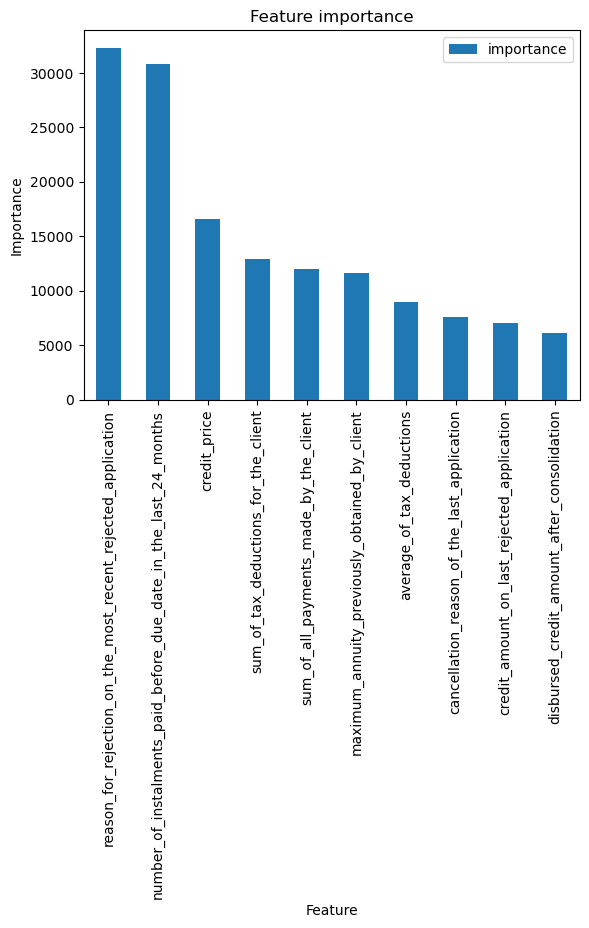

In [31]:
# plot only the top 10

import matplotlib.pyplot as plt

# Create a figure and a set of subplots

fig, ax = plt.subplots()

# Create a bar plot

feature_importance.head(10).plot(kind="bar", x="feature", y="importance", ax=ax)

# Set the title and labels

plt.title("Feature importance")

plt.ylabel("Importance")

plt.xlabel("Feature")

# Rotate the x-tick labels


plt.show()

In [32]:
# run xgboost model on the data

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)

dvalid = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)

dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "max_depth": 3,
    "eta": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_estimators": 1000,
    "verbosity": 0,
}

watchlist = [(dtrain, "train"), (dvalid, "valid")]

# Train the model and assign it to a variable
# Initialize an empty dictionary for the evaluation results
evals_result = {}

# Train the model and assign it to a variable
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=10,
    evals=watchlist,
    early_stopping_rounds=10,
    evals_result=evals_result,
)

# Print the evaluation results for the training set
print("Train AUC for each iteration: ", evals_result["train"]["auc"])

# Print the evaluation results for the validation set
print("Validation AUC for each iteration: ", evals_result["valid"]["auc"])

# Use the model object to make predictions
print(
    f"The AUC score on the train set is: {roc_auc_score(y_train, xgb_model.predict(dtrain))}"
)

[0]	train-auc:0.62054	valid-auc:0.51710
[1]	train-auc:0.63922	valid-auc:0.59293
[2]	train-auc:0.65453	valid-auc:0.62345
[3]	train-auc:0.65264	valid-auc:0.61810
[4]	train-auc:0.65454	valid-auc:0.62376
[5]	train-auc:0.65883	valid-auc:0.62412
[6]	train-auc:0.66198	valid-auc:0.61816
[7]	train-auc:0.66272	valid-auc:0.61590
[8]	train-auc:0.66288	valid-auc:0.60657
[9]	train-auc:0.66296	valid-auc:0.61127
Train AUC for each iteration:  [0.6205408415659596, 0.6392233671381061, 0.6545326883008358, 0.6526447180046141, 0.6545385061632979, 0.6588344715113927, 0.6619831754103258, 0.6627221480112018, 0.6628841312825399, 0.6629597508837716]
Validation AUC for each iteration:  [0.5171043819282012, 0.5929325134989045, 0.6234471997710869, 0.6181019429933649, 0.6237648623106122, 0.6241248354235845, 0.6181643445300168, 0.6158955740313193, 0.6065720669006668, 0.6112696676946096]
The AUC score on the train set is: 0.6629597508837716


In [33]:
evals_result

{'train': OrderedDict([('auc',
               [0.6205408415659596,
                0.6392233671381061,
                0.6545326883008358,
                0.6526447180046141,
                0.6545385061632979,
                0.6588344715113927,
                0.6619831754103258,
                0.6627221480112018,
                0.6628841312825399,
                0.6629597508837716])]),
 'valid': OrderedDict([('auc',
               [0.5171043819282012,
                0.5929325134989045,
                0.6234471997710869,
                0.6181019429933649,
                0.6237648623106122,
                0.6241248354235845,
                0.6181643445300168,
                0.6158955740313193,
                0.6065720669006668,
                0.6112696676946096])])}

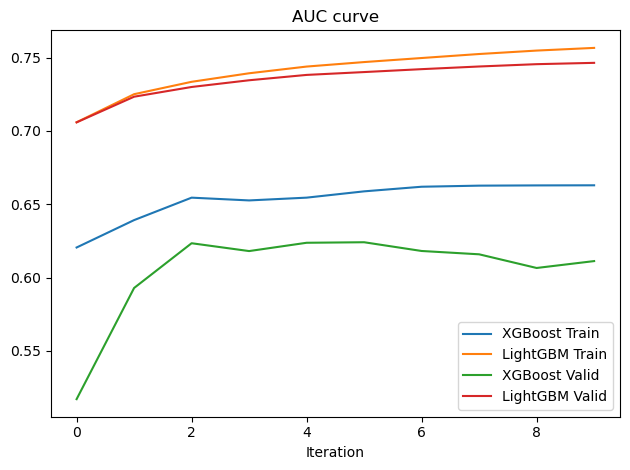

In [34]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot for the XGBoost model (training set)
ax.plot(evals_result["train"]["auc"][:10], label="XGBoost Train")

# Create a line plot for the LightGBM model (training set)
ax.plot(evals_result_lgb["training"]["auc"][:10], label="LightGBM Train")

# Create a line plot for the XGBoost model (validation set)
ax.plot(evals_result["valid"]["auc"][:10], label="XGBoost Valid")

# Create a line plot for the LightGBM model (validation set)
ax.plot(evals_result_lgb["valid_1"]["auc"][:10], label="LightGBM Valid")

# Set the title and labels
ax.set_title("AUC curve")
ax.set_xlabel("Iteration")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [43]:
X_train

,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,...,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A
0,NaN,1917.6000,0.0,NaN,NaN,NaN,NaN,30000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4937.0000,0.0,NaN,NaN,NaN,NaN,78000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3600.0000,0.0,NaN,NaN,NaN,NaN,60000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3110.8000,0.0,NaN,NaN,NaN,NaN,20000.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1218.0000,0.0,NaN,NaN,NaN,NaN,20300.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915990,104557.25,8218.0000,5293.2,8027.2000,NaN,23399.828,5293.2,132000.0,10548.4,10548.4,...,10586.400,2fc785b2,a55475b1,a55475b1,a55475b1,a55475b1,NaN,NaN,NaN,NaN
915991,176561.36,3675.4001,0.0,7356.8003,NaN,16392.496,6750.2,30000.0,0.0,0.0,...,14346.319,2fc785b2,a55475b1,a55475b1,a55475b1,a55475b1,NaN,NaN,12155.0,NaN
915992,14232.40,7788.8003,0.0,2662.4001,NaN,NaN,1500.6,60000.0,0.0,0.0,...,NaN,2fc785b2,a55475b1,a55475b1,a55475b1,a55475b1,NaN,NaN,NaN,NaN
915993,197371.58,1195.4000,2827.2,8212.6010,NaN,47943.062,9921.2,6000.0,46806.6,46806.6,...,5654.400,2fc785b2,6b2ae0fa,a55475b1,3439d993,a55475b1,NaN,NaN,15792.4,NaN


In [35]:
# One-Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_valid_encoded = pd.get_dummies(X_valid)

# Ensure the same columns in both data sets
X_train_final, X_valid_final = X_train_encoded.align(
    X_valid_encoded, join="left", axis=1
)

# # Initialize the model
# log_reg = LogisticRegression()

# # Fit the model
# log_reg.fit(X_train_final, y_train)

# # Make predictions
# y_pred = log_reg.predict(X_valid_final)

# # Calculate the AUC score
# roc_auc_score(y_valid, y_pred)

# # Calculate the AUC score
# roc_auc_score(y_valid, log_reg.predict_proba(X_valid_final)[:, 1])

In [42]:
# remove NaNs

# Drop rows with missing values

X_train_encoded

,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,...,maritalst_385M_b6cabe76,maritalst_385M_ecd83604,maritalst_385M_Unknown,maritalst_893M_1a19667c,maritalst_893M_46b968c3,maritalst_893M_977b2a70,maritalst_893M_a55475b1,maritalst_893M_e18430ff,maritalst_893M_ecd83604,maritalst_893M_Unknown


In [46]:
# One-Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_valid_encoded = pd.get_dummies(X_valid)

# Ensure the same columns in both data sets
X_train_final, X_valid_final = X_train_encoded.align(
    X_valid_encoded, join="left", axis=1
)

# Fill NaN values with the mean value of the column
X_train_final = X_train_final.fillna(X_train_final.mean())
X_valid_final = X_valid_final.fillna(X_valid_final.mean())

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train_final, y_train)

# Make predictions
y_pred = rf.predict(X_valid_final)

# Calculate the AUC score
roc_auc_score(y_valid, y_pred)

# Calculate the AUC score
roc_auc_score(y_valid, rf.predict_proba(X_valid_final)[:, 1])

In [ ]:
# just get the 20 most important

In [ ]:
x = 5
print(x)

## Submission

Scoring the submission dataset is below, we need to take care of new categories. Then we save the score as a last step. 

In [ ]:
X_submission = data_submission[cols_pred].to_pandas()
X_submission = convert_strings(X_submission)
categorical_cols = X_train.select_dtypes(include=["category"]).columns

for col in categorical_cols:
    train_categories = set(X_train[col].cat.categories)
    submission_categories = set(X_submission[col].cat.categories)
    new_categories = submission_categories - train_categories
    X_submission.loc[X_submission[col].isin(new_categories), col] = "Unknown"
    new_dtype = pd.CategoricalDtype(categories=train_categories, ordered=True)
    X_train[col] = X_train[col].astype(new_dtype)
    X_submission[col] = X_submission[col].astype(new_dtype)

y_submission_pred = gbm.predict(X_submission, num_iteration=gbm.best_iteration)

In [ ]:
submission = pd.DataFrame(
    {"case_id": data_submission["case_id"].to_numpy(), "score": y_submission_pred}
).set_index("case_id")
submission.to_csv("./submission.csv")

In [ ]:
data_submission

case_id,date_decision,MONTH,WEEK_NUM,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastcancelreason_561M,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectreason_759M,lastrejectreasonclient_4145040M,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,previouscontdistrict_112M,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A,mainoccupationinc_384A_max,mainoccupationinc_384A_any_selfemployed,person_housetype,pmts_pmtsoverdue_635A_max,pmts_dpdvalue_108P_over31
i64,str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,bool,str,f64,bool
57543,"""2021-05-14""",202201,100,191767.36,3674.6,1218.2001,16049.4,17054.4,14554.4,24482.0,20000.0,12154.4,0.0,20000.0,0.0,null,"""a55475b1""","""a55475b1""",14000.0,"""a55475b1""",null,null,"""P109_133_183""","""P49_111_165""",24000.0,"""a55475b1""","""a55475b1""",34000.0,280983.56,null,231440.03,131700.8,16672.6,157731.78,16641.4,"""a55475b1""",0.0,12154.4,12154.4,12154.4,456031.1,17859.6,"""2fc785b2""","""6b2ae0fa""","""a55475b1""","""38c061ee""","""a55475b1""",null,null,null,null,34000.0,false,null,null,null
57549,"""2022-01-17""",202201,100,129704.4,5742.6,3546.6,32426.201,118964.805,13681.714,32426.201,75000.0,10638.2,10638.2,75000.0,0.0,null,"""a55475b1""","""a55475b1""",94000.0,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",160000.0,"""a55475b1""","""P30_86_84""",44000.0,337659.8,null,34066.0,122511.4,31820.6,21278.0,122511.4,"""a55475b1""",null,10638.2,10638.2,10638.2,373720.84,126058.0,"""2fc785b2""","""39a0853f""","""a55475b1""","""a7fcb6e5""","""a55475b1""",null,null,26815.6,null,49800.0,false,null,null,null
57551,"""2020-11-27""",202201,100,71036.4,2844.6,0.0,8357.2,null,0.0,9551.0,27095.201,0.0,0.0,27095.201,0.0,null,"""a55475b1""","""a55475b1""",200000.0,"""P85_114_140""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",70000.0,83400.0,null,54000.0,41783.402,54000.0,62619.0,null,"""P11_36_178""",27095.201,0.0,0.0,0.0,75219.0,null,"""2fc785b2""","""6b2ae0fa""","""a55475b1""","""3439d993""","""a55475b1""",null,null,null,null,59600.0,false,null,null,null
57552,"""2020-11-27""",202201,100,183992.0,6298.8003,12155.4,7440.4,null,199322.4,9148.4,100000.0,191269.61,191269.61,100000.0,0.0,null,"""a55475b1""","""a55475b1""",0.0,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",150000.0,"""a55475b1""","""P94_109_143""",null,110500.0,null,188126.14,12155.4,104473.6,288642.6,12155.4,"""P21_87_50""",null,191269.61,191269.61,191269.61,284213.0,18889.0,"""2fc785b2""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,23402.8,null,112000.0,false,"""OWNED""",null,null
57569,"""2021-12-20""",202201,100,0.0,4682.6,0.0,null,null,null,10796.4,60000.0,0.0,0.0,60000.0,0.0,null,"""a55475b1""","""a55475b1""",20000.0,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",40000.0,"""a55475b1""","""P94_109_143""",6000.0,37704.0,null,64555.668,null,null,0.0,null,"""a55475b1""",null,0.0,0.0,0.0,95348.42,null,"""2fc785b2""","""717ddd49""","""a55475b1""","""3439d993""","""a55475b1""",null,null,17333.6,null,58000.0,false,"""OWNED""",null,null
57630,"""2021-03-16